<a href="https://colab.research.google.com/github/Atria14/data-science/blob/main/07_tauron_dane/elicznik_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r'tauron.csv', delimiter=',',
                   names=['data', 'consumed', 'produced'], header=None, parse_dates=['data']) # zmienna parse_date ustawia timestamp przy datach!
df = pd.DataFrame(data)


In [78]:
df.head()

,data,consumed,produced
0,2022-04-01 01:00:00,0.313,0.0
1,2022-04-01 02:00:00,0.310,0.0
2,2022-04-01 03:00:00,0.250,0.0
3,2022-04-01 04:00:00,0.259,0.0
4,2022-04-01 05:00:00,0.269,0.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 0 to 7823
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7824 non-null   datetime64[ns]
 1   consumed  7824 non-null   float64       
 2   produced  7824 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 183.5 KB


In [80]:
# df['data'] = pd.to_datetime(df['data']) # convert column data type object to datetime > generuje błąd bo zeruje daty od 1970 roku

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 0 to 7823
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7824 non-null   datetime64[ns]
 1   consumed  7824 non-null   float64       
 2   produced  7824 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 183.5 KB


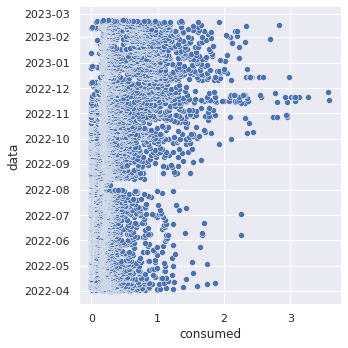

In [82]:
_ = sns.relplot(data=df, x='consumed', y='data')

In [83]:
df.head()

,data,consumed,produced
0,2022-04-01 01:00:00,0.313,0.0
1,2022-04-01 02:00:00,0.310,0.0
2,2022-04-01 03:00:00,0.250,0.0
3,2022-04-01 04:00:00,0.259,0.0
4,2022-04-01 05:00:00,0.269,0.0


In [84]:
df['data'].min()

Timestamp('2022-04-01 01:00:00')

In [85]:
#adding a column with month only

df['month'] = df['data'].dt.month
df.head()

,data,consumed,produced,month
0,2022-04-01 01:00:00,0.313,0.0,4
1,2022-04-01 02:00:00,0.310,0.0,4
2,2022-04-01 03:00:00,0.250,0.0,4
3,2022-04-01 04:00:00,0.259,0.0,4
4,2022-04-01 05:00:00,0.269,0.0,4


In [86]:
#adding a column with year only
df['year'] = df['data'].dt.year
df.head()

,data,consumed,produced,month,year
0,2022-04-01 01:00:00,0.313,0.0,4,2022
1,2022-04-01 02:00:00,0.310,0.0,4,2022
2,2022-04-01 03:00:00,0.250,0.0,4,2022
3,2022-04-01 04:00:00,0.259,0.0,4,2022
4,2022-04-01 05:00:00,0.269,0.0,4,2022


In [96]:
df.set_index('data')


,consumed,produced,month,year
data,,,,
2022-04-01 01:00:00,0.313,0.0,4,2022
2022-04-01 02:00:00,0.310,0.0,4,2022
2022-04-01 03:00:00,0.250,0.0,4,2022
2022-04-01 04:00:00,0.259,0.0,4,2022
2022-04-01 05:00:00,0.269,0.0,4,2022
...,...,...,...,...
2023-02-20 20:00:00,0.471,0.0,2,2023
2023-02-20 21:00:00,0.293,0.0,2,2023
2023-02-20 22:00:00,0.270,0.0,2,2023


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 0 to 7823
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7824 non-null   datetime64[ns]
 1   consumed  7824 non-null   float64       
 2   produced  7824 non-null   float64       
 3   month     7824 non-null   int64         
 4   year      7824 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 305.8 KB


In [100]:
df.head()

,data,consumed,produced,month,year
0,2022-04-01 01:00:00,0.313,0.0,4,2022
1,2022-04-01 02:00:00,0.310,0.0,4,2022
2,2022-04-01 03:00:00,0.250,0.0,4,2022
3,2022-04-01 04:00:00,0.259,0.0,4,2022
4,2022-04-01 05:00:00,0.269,0.0,4,2022


In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

df.groupby(df['data'].dt.month)['consumed'].mean().plot(kind='bar', rot=0, ax=axs)



# Nowa sekcja